The idea behind this analysis was to compare the performance of an **ANN** with the analysis done by **@QUSAY AL-BTOUSH**.

He has achieved an accuracy of 82%, which led me to think that given such a large dataset to analyze, it could be more appropriate to use an ANN to achieve more precision than **Random Forest** algorythm.

But it must be said, I have little experience with these algorithms and I'm not sure if the parameters and data processing that I have used in this exercise are the most optimal for it(Probably not). If you know any way to improve my sequential model to have a better accuracy in the predictions, I would appreciate it.

Thanks for your attention!

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/body-signal-of-smoking/smoking.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_train.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Analyze data

In [3]:
df = pd.read_csv('/kaggle/input/body-signal-of-smoking/smoking.csv')

Here we can analyze the **27 columns** that our dataset has, including the **type** and **amount** of data we have

In [4]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

# Clean data

Let's make **dummies** of the **'tartar'** and **'gender'** columns to convert the objects into integers so our **ANN** understands the data better.

And get rid of the **'oral'** column to completely clean the dataset from objects

In [6]:
dummies_tartar = pd.get_dummies(df['tartar'])
dummies_gender = pd.get_dummies(df['gender'])

In [7]:
#Example of what dummies look like inside

dummies_tartar.head() 

,N,Y
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [8]:
#Join dummies to original dataframe

df = df.join(dummies_tartar)
df = df.join(dummies_gender)

In [9]:
#Delete unnecesary columns

del df['tartar']
del df['gender']
del df['oral']

Analyze our new Dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [11]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,N,Y,F,M
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,0.7,18.0,19.0,27.0,0,0,0,1,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,0.6,22.0,19.0,18.0,0,0,0,1,1,0
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,1.0,21.0,16.0,22.0,0,1,1,0,0,1
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,1.0,19.0,26.0,18.0,0,0,0,1,0,1
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,0.6,16.0,14.0,22.0,0,0,1,0,1,0


Create the X and Y axes to fill the **features** and **values** that will be used on the **ANN** after it first passed through the **scaler** to transform all data between 0 and 1 so our model works faster

In [12]:
feature_name = ["ID", "age", "height(cm)", "weight(kg)", "waist(cm)", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "systolic", "relaxation", "fasting blood sugar", "Cholesterol", "triglyceride", "HDL", "LDL", "hemoglobin", "Urine protein", "serum creatinine", "AST", "ALT", "Gtp", "dental caries", "N", "Y", "F", "M"]

dfX = df[feature_name]
dfY = df["smoking"]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(dfX)
dfX = scaler.transform(dfX)
dfX = pd.DataFrame(dfX, columns=feature_name)

Example of the dataset we will be using to feed our model

In [15]:
dfX.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,N,Y,F,M
0,0.000000,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.0,0.0,0.254438,...,0.0,0.052174,0.009195,0.006179,0.026052,0.0,0.0,1.0,1.0,0.0
1,0.000018,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.0,0.0,0.284024,...,0.0,0.043478,0.012261,0.006179,0.017034,0.0,0.0,1.0,1.0,0.0
2,0.000036,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.0,0.0,0.396450,...,0.0,0.078261,0.011494,0.005149,0.021042,0.0,1.0,0.0,0.0,1.0
3,0.000054,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.0,0.0,0.171598,...,0.0,0.078261,0.009962,0.008582,0.017034,0.0,0.0,1.0,0.0,1.0
4,0.000072,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.0,0.0,0.289941,...,0.0,0.043478,0.007663,0.004463,0.021042,0.0,1.0,0.0,1.0,0.0


In [16]:
dfY.head()

0    0
1    0
2    1
3    0
4    0
Name: smoking, dtype: int64

# Split data

As always, we must divide the data into **test** and **train** to validate our accuracy later

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=1)

# Build and train the model

I'm aware that my model could be much better and would need help to improve its accuracy

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import *
from keras.initializers import *
from keras.layers import Dropout

To create a **Sequential** model for **binary classification** we must select the **Sigmoid** activation function in the last layer and enable only **1** neuron

In [19]:
model = Sequential()

#Since the total number of columns in the dataframe is 27, that's what we fill in input dimension

model.add(Dense(10, input_dim=27, kernel_initializer='normal', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Compile model. We use logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the ANN to the Training set
fit = model.fit(X_train, y_train, batch_size = 10, epochs = 10 ,verbose = 2, validation_data=(X_test, y_test))

#Making predictions and evaluating the model
score, acc = model.evaluate(X_train, y_train,
                            batch_size=10)

print('Train score:', score)
print('Train accuracy:', acc)

#Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)


2022-05-13 18:14:59.610385: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-13 18:14:59.814188: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
4456/4456 - 9s - loss: 0.4980 - accuracy: 0.7171 - val_loss: 0.4752 - val_accuracy: 0.7327
Epoch 2/10
4456/4456 - 8s - loss: 0.4833 - accuracy: 0.7349 - val_loss: 0.4738 - val_accuracy: 0.7331
Epoch 3/10
4456/4456 - 8s - loss: 0.4793 - accuracy: 0.7403 - val_loss: 0.4720 - val_accuracy: 0.7388
Epoch 4/10
4456/4456 - 8s - loss: 0.4774 - accuracy: 0.7428 - val_loss: 0.4621 - val_accuracy: 0.7493
Epoch 5/10
4456/4456 - 8s - loss: 0.4760 - accuracy: 0.7436 - val_loss: 0.4612 - val_accuracy: 0.7522
Epoch 6/10
4456/4456 - 8s - loss: 0.4751 - accuracy: 0.7450 - val_loss: 0.4594 - val_accuracy: 0.7528
Epoch 7/10
4456/4456 - 8s - loss: 0.4745 - accuracy: 0.7438 - val_loss: 0.4572 - val_accuracy: 0.7594
Epoch 8/10
4456/4456 - 8s - loss: 0.4734 - accuracy: 0.7469 - val_loss: 0.4686 - val_accuracy: 0.7323
Epoch 9/10
4456/4456 - 7s - loss: 0.4731 - accuracy: 0.7475 - val_loss: 0.4617 - val_accuracy: 0.7439
Epoch 10/10
4456/4456 - 7s - loss: 0.4709 - accuracy: 0.7490 - val_loss: 0.4572 - 

# Analyze the predictions

Use **matplotlib** to generate a graph that shows us the progression of our model with the **Training and Validation loss**

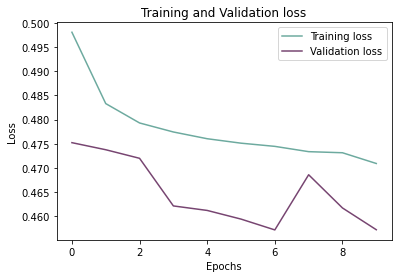

In [20]:
history_df = pd.DataFrame(fit.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

We use **Sklearn** to generate a **Confusion matrix** that helps us to see the distribution of the errors of our algorithm and a **Roc curve** for a better understanding of the learning of our model

Text(0.5, 15.0, 'Predicted label')

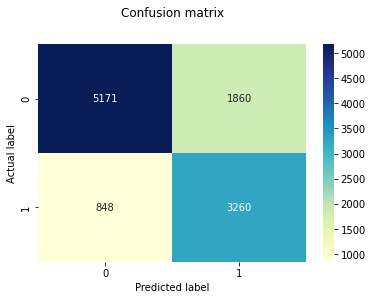

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

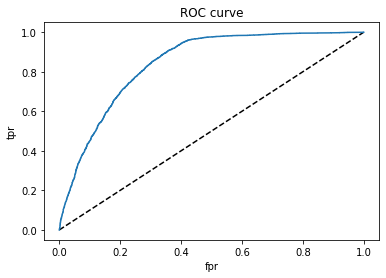

In [22]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()